***Fundamentals of Solar Cells and Photovoltaic Systems Engineering***

**Solutions Manual - Chapter 11**

***Problem 11.7***


***[ENUNCIADO]***

***Solve the problem using PVMismatch***

We will use the packages [PVMismatch](https://sunpower.github.io/PVMismatch/) and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.


In [1]:
import math
from copy import deepcopy

import pvmismatch as pvmm
import matplotlib.pyplot as plt

We are definingg in `PVMismatch` a PV module with series connected cells and distributed in 3 rows and 5 columns

In [2]:
cell_pos = pvmm.pvmodule.standard_cellpos_pat(nrows=3, ncols_per_substr=5*[1])
pvmod_flat = pvmm.PVmodule(cell_pos=cell_pos)

print(cell_pos)

[[[{'crosstie': False, 'idx': 0}, {'crosstie': False, 'idx': 1}, {'crosstie': False, 'idx': 2}]], [[{'crosstie': False, 'idx': 5}, {'crosstie': False, 'idx': 4}, {'crosstie': False, 'idx': 3}]], [[{'crosstie': False, 'idx': 6}, {'crosstie': False, 'idx': 7}, {'crosstie': False, 'idx': 8}]], [[{'crosstie': False, 'idx': 11}, {'crosstie': False, 'idx': 10}, {'crosstie': False, 'idx': 9}]], [[{'crosstie': False, 'idx': 12}, {'crosstie': False, 'idx': 13}, {'crosstie': False, 'idx': 14}]]]


The `cell_pos` object can be interpreted graphically like this image.

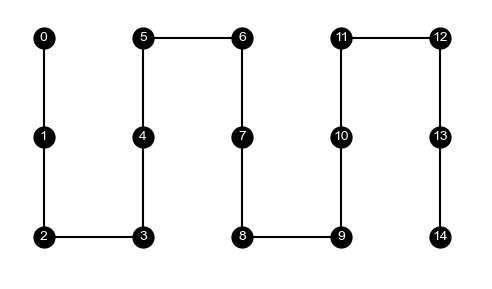

The `cell_pos` object can be interpreted graphically like this image.

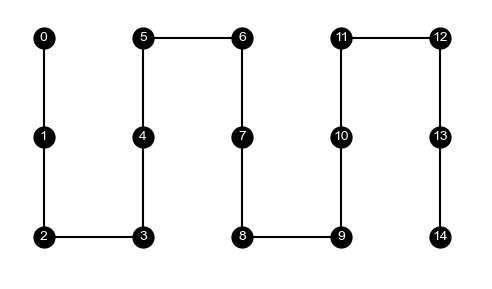

An additional PV module is defined with the same configuration but considering that is curved

In [3]:
pvmod_curve = pvmm.PVmodule(cell_pos=cell_pos)

def get_aoi_projection(side, radius):
    aoi = side / (2 * math.pi * radius) * 360
    aoi_projection = math.cos(math.radians(aoi))
    return aoi_projection

cell_side = 156
mod_radius = 1000
mid_col = 2.5

for row_pos, row in enumerate([[0, 5, 6, 11, 12], [1, 4, 7, 10, 13], [2, 3, 8, 9, 14]]):
    for col_pos, cell_idx in enumerate(row):
        aoi_proj = get_aoi_projection(side=(col_pos + 0.5 - mid_col) * cell_side, radius=mod_radius)
        pvmod_curve.setSuns(aoi_proj, cells=[cell_idx])

print(pvmod_curve.Ee)

[[0.95172155]
 [0.95172155]
 [0.95172155]
 [0.98785666]
 [0.98785666]
 [0.98785666]
 [1.        ]
 [1.        ]
 [1.        ]
 [0.98785666]
 [0.98785666]
 [0.98785666]
 [0.95172155]
 [0.95172155]
 [0.95172155]]


Three other PV modules copies from the curve module are defined considering increasing levels of shading

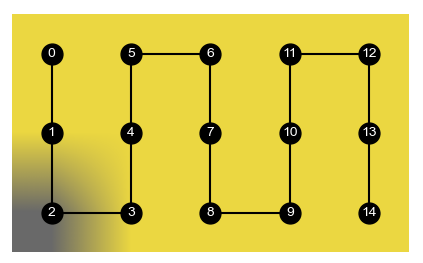
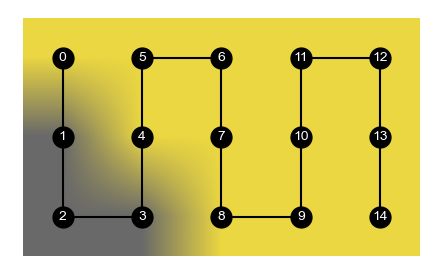
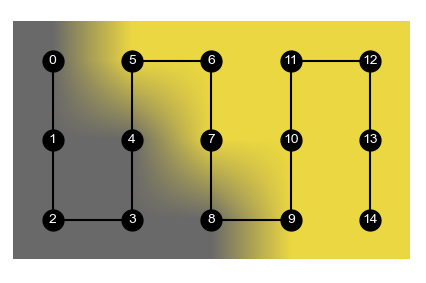

In [4]:
pvmod_curve_shade1 = deepcopy(pvmod_curve)
pvmod_curve_shade1.setSuns(0.1, cells=[2])

pvmod_curve_shade2 = deepcopy(pvmod_curve)
pvmod_curve_shade2.setSuns(0.1, cells=[2, 1, 3])

pvmod_curve_shade3 = deepcopy(pvmod_curve)
pvmod_curve_shade3.setSuns(0.1, cells=[2, 1, 3, 0, 4, 8])

print(pvmod_curve_shade3.Ee)

[[0.1       ]
 [0.1       ]
 [0.1       ]
 [0.1       ]
 [0.1       ]
 [0.98785666]
 [1.        ]
 [1.        ]
 [0.1       ]
 [0.98785666]
 [0.98785666]
 [0.98785666]
 [0.95172155]
 [0.95172155]
 [0.95172155]]


Pmp of flat = 50.2 W
Pmp of curve = 48.7 W
Pmp of curve shade1 = 36.3 W
Pmp of curve shade2 = 23.4 W
Pmp of curve shade3 = 10.7 W


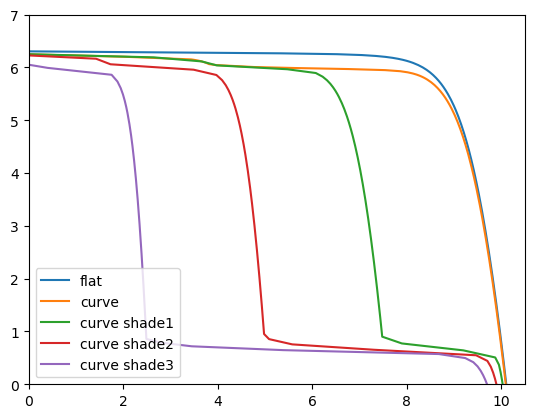

In [6]:
fig, ax = plt.subplots()

list_mods = [pvmod_flat, pvmod_curve, pvmod_curve_shade1, pvmod_curve_shade2, pvmod_curve_shade3]
list_names_mods = ['flat', 'curve', 'curve shade1', 'curve shade2', 'curve shade3']

for mod, name_mod in zip(list_mods, list_names_mods):
    ax.plot(mod.Vmod, mod.Imod)
    pmp = pvmm.PVsystem(pvmods=mod, numberStrs=1, numberMods=1).Pmp
    print(f'Pmp of {name_mod} = {pmp:.1f} W')

ax.set_xlim(0, pvmod_curve.numberCells * 0.7)
ax.set_ylim(0, 7)
ax.legend(list_names_mods, loc='lower left')